In [111]:
# !pip install matplotlib==3.4.3
# !pip install --upgrade statsmodels

In [112]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

### Exercise 1

The file lightbulbs.csv contains a random sample of
100 lightbulb lifetimes. The company that produces
these lightbulbs wants to know whether it can claim
that its lightbulbs typically last more than 1000 burning
hours.
1. Identify the null and alternative hypotheses for this
situation.
2. Can this lightbulb manufacturer claim that its
lightbulbs typically last more than 1000 hours at
the 5% significance level? What about at the 1%
significance level?


In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Lightbulbs.csv', sep=";")
df.head()

,Lightbulb,Lifetime
0,1,840.08
1,2,960.00
2,3,953.38
3,4,981.14
4,5,938.66


H0 = Lifetime = 1000

HA = lifetime < 1000

In [114]:
alpha = 0.05

mean_HA = df.Lifetime.mean()
sigma_H0 = df.Lifetime.std()

print("mean : ", mean_H0)
print("std : ", sigma_H0)

p_value = stats.norm.sf(mean_HA, loc=mean_H0, scale = sigma_H0)

print("P : ", p_value)

if (p_value > alpha):
    print("p > alpha : we reject the null hypothesis (i.e. given the null hypothesis and the significance level this sample is too unlikely)")
else:
    print("p < a : we fail to reject the null hypothesis (i.e. given the null hypothesis and the significance level this sample is acceptable)")


mean :  991.0186000000001
std :  87.16791333507943
P :  0.5
p > alpha : we reject the null hypothesis (i.e. given the null hypothesis and the significance level this sample is too unlikely)


In [115]:
# Population mean under the null hypothesis
population_mean_null = 1000

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['Lifetime'], population_mean_null)

print("Calculated t-statistic:", t_statistic)
print("Calculated p-value:", p_value)

alpha_1 = 0.05
alpha_2 = 0.01

if p_value < alpha_1:
    print("Reject the null hypothesis at 5% significance level.")
else:
    print("Fail to reject the null hypothesis at 5% significance level.")

if p_value < alpha_2:
    print("Reject the null hypothesis at 1% significance level.")
else:
    print("Fail to reject the null hypothesis at 1% significance level.")

Calculated t-statistic: -1.0303562006210678
Calculated p-value: 0.30535350978091363
Fail to reject the null hypothesis at 5% significance level.
Fail to reject the null hypothesis at 1% significance level.


### Exercise 2

The file Low calorie soft drinks.csv categorizes 250 randomly
selected consumers on the basis of their gender, their
age, and their preference for our brand or a competitor's
brand of a low-calorie soft drink.   
First make a stacked barplot.  
Then use a test to see whether the drink
preference is independent of gender.

In [116]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Low%20calorie%20soft%20drinks.csv', sep=";")
df.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


<Axes: ylabel='Gender'>

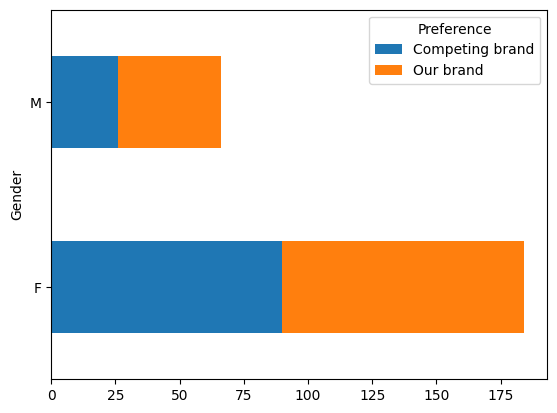

In [117]:
# Contingency table without the margins
observed = pd.crosstab(df.Gender, df.Preference)

# Horizontally oriented stacked bar chart
observed.plot(kind='barh', stacked=True)


In [118]:
observed = pd.crosstab(df.Gender, df.Preference)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(row_sums)
print(col_sums)
print(f'Number of observations: {n}')

Gender
F    184
M     66
dtype: int64
Preference
Competing brand    116
Our brand          134
dtype: int64
Number of observations: 250


In [119]:
expected = np.outer(row_sums, col_sums) / n
expected

array([[85.376, 98.624],
       [30.624, 35.376]])

In [120]:
exp_row_sums = np.sum(expected, axis=1)
exp_col_sums = np.sum(expected, axis=0)

print(f'Row totals   : {exp_row_sums}')
print(f'Column totals: {exp_col_sums}')
print(f'Observations : {exp_col_sums.sum()}')

Row totals   : [184.  66.]
Column totals: [116. 134.]
Observations : 250.0


In [121]:
diffs = (expected - observed)**2 / expected
print(diffs)

Preference  Competing brand  Our brand
Gender                                
F                  0.250438   0.216797
M                  0.698190   0.604403


In [122]:
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

χ² ≈ 1.770


In [123]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)

0.0841386541667046


In [124]:
observed = pd.crosstab(df.Gender, df.Preference)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()
expected = np.outer(row_sums, col_sums) / n
exp_row_sums = np.sum(expected, axis=1)
exp_col_sums = np.sum(expected, axis=0)


diffs = (expected - observed)**2 / expected

chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)

χ² ≈ 1.770
0.0841386541667046


| Cramér's V | Interpretation          |
| :---:      | :---                    |
| 0          | No association          |
| 0.1        | Weak association        |
| 0.25       | Moderate association    |
| 0.50       | Strong association      |
| 0.75       | Very strong association |
| 1          | Complete association    |

according to the table above with a Cramér's V of 0.084 their is no association

# Exercise 3
The owner of Original Italian Pizza restaurant chain
wants to understand which variable most strongly
influences the sales of his specialty deep-dish
pizza. He has gathered data on the monthly sales of
deep-dish pizzas at his restaurants and observations on
other potentially relevant variables for each of several
outlets in central Indiana. These data are provided in
the file pizzas.csv. Estimate a simple linear regression
equation between the quantity sold (Y) and each
of the following candidates for the best explanatory
variable: average price of deep-dish pizzas, monthly
advertising expenditures, and disposable income per
household in the areas surrounding the outlets. Which
variable is most strongly associated with the number
of pizzas sold? Explain your choice.  
Start by transforming the text values to a float. Divide Quantity Sold, Monthly Advertising Expenditures and Disposable Income Per Househols by 100.  
Make a plot  

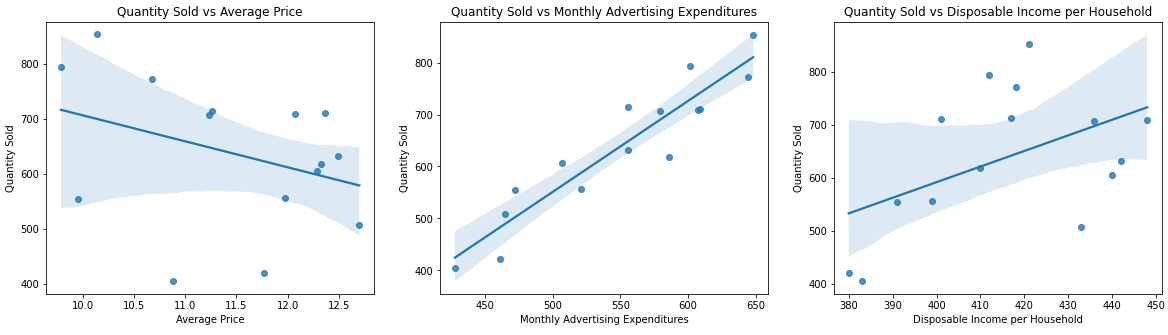

In [125]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/pizzas.csv', sep=";")
df.head(10)

,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,85 300,"$10,14",$64 800,$42 100
1,2,40 500,"$10,88",$42 800,$38 300
2,3,61 800,"$12,33",$58 600,$41 000
3,4,50 800,"$12,70",$46 500,$43 300
4,5,60 600,"$12,29",$50 700,$44 000
5,6,79 400,"$9,79",$60 100,$41 200
6,7,71 400,"$11,26",$55 600,$41 700
7,8,70 700,"$11,23",$57 900,$43 600
8,9,55 600,"$11,97",$52 100,$39 900
9,10,70 900,"$12,07",$60 700,$44 800


In [126]:
import locale

cols_with_dollars = ['Quantity Sold', 'Average Price','Monthly Advertising Expenditures','Disposable Income per Household']

for col in cols_with_dollars:
    df[col] = df[col].apply(lambda x: str(x).replace('$', ''))
    df[col] = df[col].apply(lambda x: str(x).replace(' ', ''))
    df[col] = df[col].apply(lambda x: str(x).replace(',', '.'))
    df[col] = df[col].apply(lambda x: locale.atof(x))

  
df['Quantity Sold'] = df['Quantity Sold']/100 
    
df.head()

,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,853.0,10.14,64800.0,42100.0
1,2,405.0,10.88,42800.0,38300.0
2,3,618.0,12.33,58600.0,41000.0
3,4,508.0,12.70,46500.0,43300.0
4,5,606.0,12.29,50700.0,44000.0


<Axes: xlabel='Monthly Advertising Expenditures', ylabel='Quantity Sold'>

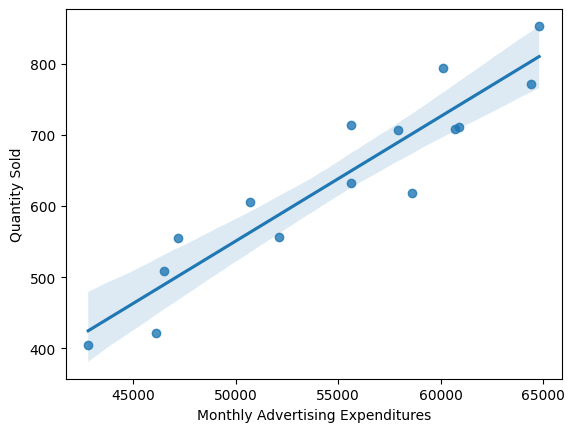

In [127]:

sns.regplot(y='Quantity Sold', x='Monthly Advertising Expenditures', data=df)



<Axes: xlabel='Disposable Income per Household', ylabel='Quantity Sold'>

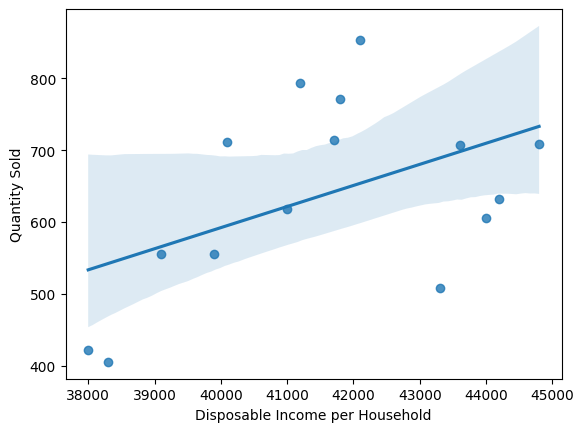

In [128]:
sns.regplot(y='Quantity Sold', x='Disposable Income per Household', data=df)

<Axes: xlabel='Average Price', ylabel='Quantity Sold'>

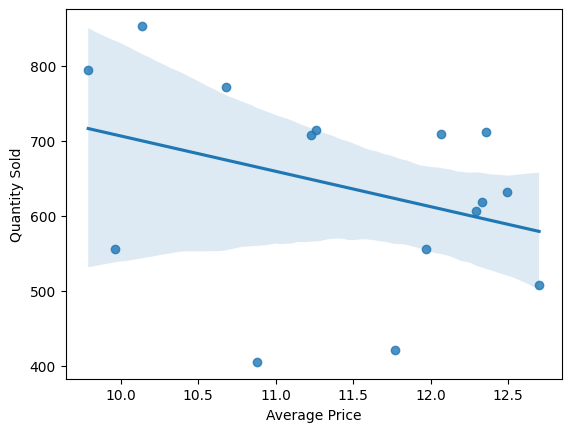

In [129]:
sns.regplot(y='Quantity Sold', x='Average Price', data=df)

In [130]:
def r_rSquared(x_axis, y_axis):

    covar = np.cov(x_axis, y_axis, ddof=1)[0][1]

    # Correlation calculated from covariance
    R1 = covar / (y_axis.std() * x_axis.std())
    print(f"R = {R1}")
    print("R² = ", R1**2)

print('Average price:')    
r_rSquared(df['Average Price'], df['Quantity Sold'])

print('Disposable Monthly Income')
r_rSquared(df['Disposable Income per Household'], df['Quantity Sold'])

print('Monthly Advertising Expenditures')
r_rSquared(df['Monthly Advertising Expenditures'], df['Quantity Sold'])


Average price:
R = -0.3502036809966065
R² =  0.12264261818357292
Disposable Monthly Income
R = 0.48348326856786145
R² =  0.23375607098506285
Monthly Advertising Expenditures
R = 0.9339944002298566
R² =  0.8723455396607295
